In [10]:
import sys

sys.path.append('../')

In [14]:
%load_ext autoreload
%autoreload 2

In [68]:
import numpy as np
import time
from core.function import F1, Rosenbrock, F2neg
from search.grad import grad_adapter
from search.grad_fr import gradient_fr
from search.newton import newton
from utils.matplotlib_utils import draw_paths

In [33]:
def show_stat(path):
    print('Result:', path[-1])
    print('Iterations:', len(path))
    print("\n");
    
def show_stats(stats):
    print("Algo   ", "Mean time ","Mean iteration")
    print("Grad", np.mean(np.array([stats[0][i][0] for i in range(len(stats[0]))])), np.mean(np.array([stats[0][i][1] for i in range(len(stats[0]))])))
    print("Grad FR", np.mean(np.array([stats[1][i][0] for i in range(len(stats[1]))])), np.mean(np.array([stats[1][i][1] for i in range(len(stats[1]))])))
    print("Newton ", np.mean(np.array([stats[2][i][0] for i in range(len(stats[2]))])), np.mean(np.array([stats[2][i][1] for i in range(len(stats[2]))])))

In [36]:
def analyze(points, f):
    stats = [[],[],[]]
    for point in points:
        print("Point: ", point, "\n")
        print("grad")
        start_time = time.time()
        _, _, path = grad_adapter(F1(), point)
        stats[0].append([time.time() - start_time, len(path)])
        show_stat(path)
        print("grad_fr")
        start_time = time.time()
        _, _, path = gradient_fr(F1(), point)
        stats[1].append([time.time() - start_time, len(path)])
        show_stat(path)
        print("newton")
        start_time = time.time()
        _, _, path = newton(F1(), point)
        stats[2].append([time.time() - start_time, len(path)])
        show_stat(path)
    show_stats(stats)

In [37]:
points = [np.array([0.,0.]), np.array([15.,15]), np.array([-15.,15.]), np.array([15.,-15.]), np.array([-15.,-15])]

In [38]:
analyze(points, F1())

Point:  [0. 0.] 

grad
Result: [0.99899777 0.99899777]
Iterations: 1389


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [15. 15.] 

grad
Result: [1.00100445 1.00100445]
Iterations: 1919


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15.  15.] 

grad
Result: [0.99991269 0.99991225]
Iterations: 6


grad_fr
Result: [1.00000001 1.00000001]
Iterations: 5


newton
Result: [1. 1.]
Iterations: 2


Point:  [ 15. -15.] 

grad
Result: [0.99993853 0.99993823]
Iterations: 6


grad_fr
Result: [1. 1.]
Iterations: 5


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15. -15.] 

grad
Result: [0.99900133 0.99899134]
Iterations: 1946


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Algo    Mean time  Mean iteration
Grad 1.3507705211639405 1053.2
Grad FR 0.0015508651733398438 4.4
Newton  0.0003729820251464844 2.0


In [39]:
analyze(points, Rosenbrock())

Point:  [0. 0.] 

grad
Result: [0.99899777 0.99899777]
Iterations: 1389


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [15. 15.] 

grad
Result: [1.00100445 1.00100445]
Iterations: 1919


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15.  15.] 

grad
Result: [0.99991269 0.99991225]
Iterations: 6


grad_fr
Result: [1.00000001 1.00000001]
Iterations: 5


newton
Result: [1. 1.]
Iterations: 2


Point:  [ 15. -15.] 

grad
Result: [0.99993853 0.99993823]
Iterations: 6


grad_fr
Result: [1. 1.]
Iterations: 5


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15. -15.] 

grad
Result: [0.99900133 0.99899134]
Iterations: 1946


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Algo    Mean time  Mean iteration
Grad 1.2935707569122314 1053.2
Grad FR 0.0014881610870361329 4.4
Newton  0.00031218528747558596 2.0


In [55]:
analyze(points, F2neg())

Point:  [0. 0.] 

grad
Result: [0.99899777 0.99899777]
Iterations: 1389


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [15. 15.] 

grad
Result: [1.00100445 1.00100445]
Iterations: 1919


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15.  15.] 

grad
Result: [0.99991269 0.99991225]
Iterations: 6


grad_fr
Result: [1.00000001 1.00000001]
Iterations: 5


newton
Result: [1. 1.]
Iterations: 2


Point:  [ 15. -15.] 

grad
Result: [0.99993853 0.99993823]
Iterations: 6


grad_fr
Result: [1. 1.]
Iterations: 5


newton
Result: [1. 1.]
Iterations: 2


Point:  [-15. -15.] 

grad
Result: [0.99900133 0.99899134]
Iterations: 1946


grad_fr
Result: [1. 1.]
Iterations: 4


newton
Result: [1. 1.]
Iterations: 2


Algo    Mean time  Mean iteration
Grad 1.3689197063446046 1053.2
Grad FR 0.0014888286590576173 4.4
Newton  0.00032253265380859374 2.0


In [48]:
def analyze_paths(point, f):
    _, _, path1 = grad_adapter(f, point)
    _, _, path2 = gradient_fr(f, point)
    _, _, path3 = newton(f, point)
    draw_paths(f.f, [path1, path2, path3], -3, 3, 0.2, -1, 4, 0.2, 100) 

100%|██████████| 23/23 [00:00<00:00, 308.87it/s]

Algo:  grad
Result: [1.00100223 1.00100223]
Iterations: 1389


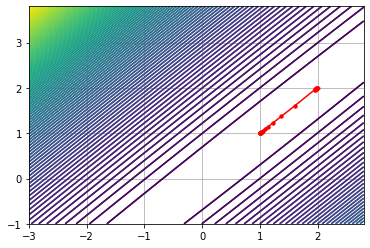

100%|██████████| 3/3 [00:00<00:00, 252.19it/s]

Algo:  grad_fr
Result: [1. 1.]
Iterations: 4


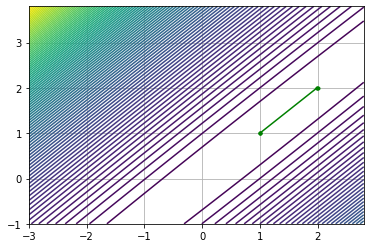

100%|██████████| 1/1 [00:00<00:00, 233.98it/s]

Algo:  newton
Result: [1. 1.]
Iterations: 2


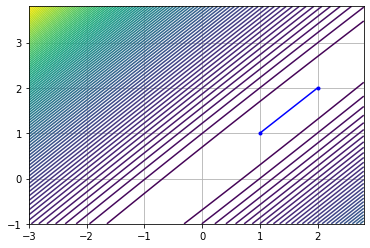

In [69]:
point = np.array([2., 2.])
analyze_paths(point, F1())

100%|██████████| 15/15 [00:00<00:00, 343.74it/s]

Algo:  grad
Result: [1.00097462 1.00195454]
Iterations: 536


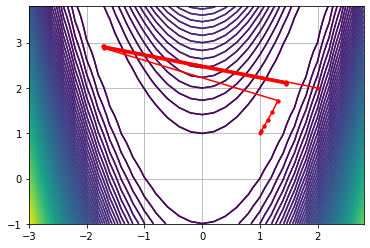

100%|██████████| 11/11 [00:00<00:00, 358.12it/s]

Algo:  grad_fr
Result: [0.99847585 0.99693928]
Iterations: 106


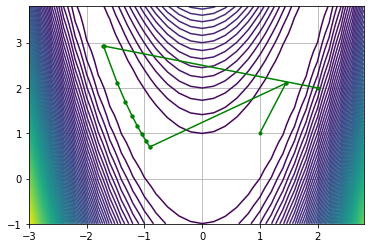

100%|██████████| 5/5 [00:00<00:00, 316.80it/s]

Algo:  newton
Result: [1. 1.]
Iterations: 6


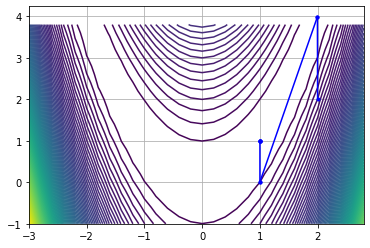

In [73]:
point = np.array([2., 2.])
analyze_paths(point, Rosenbrock())

100%|██████████| 5/5 [00:00<00:00, 338.34it/s]

Algo:  grad
Result: [1.96711603 2.8860359 ]
Iterations: 6


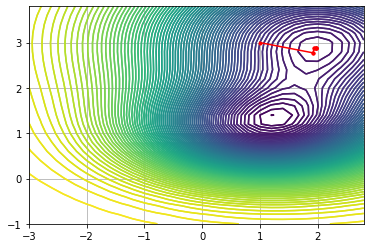

100%|██████████| 4/4 [00:00<00:00, 293.47it/s]

Algo:  grad_fr
Result: [1.96714276 2.88611778]
Iterations: 5


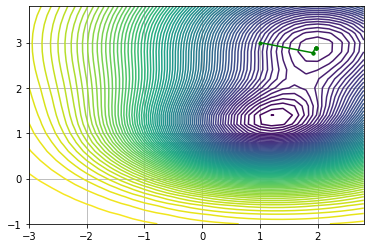

100%|██████████| 4/4 [00:00<00:00, 351.61it/s]

Algo:  newton
Result: [1.96715142 2.88611471]
Iterations: 5


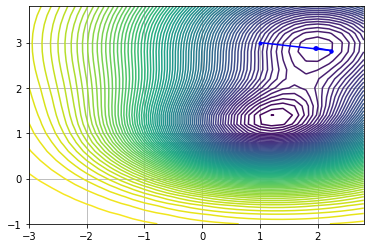

In [64]:
point = np.array([1., 3.])
analyze_paths(point, F2neg())